In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm

In [ ]:
!pip install wandb
import wandb
wandb.init(project="visualize-sklearn")

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


In [ ]:
binary_vectors = 'stock2vec_Keyed_Binary.bin'
text_vectors = 'stock2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

In [ ]:
weights = model.wv.vectors
weights

In [ ]:
esg = read_csv('../notebooks/content/esg.csv', )
esg.columns

In [ ]:
columns = ['Symbol', 'Name', 'Sector', 'Price', 'PricePerEarnings', 'DividendYield', 'EarningsPerShare', '52WeekLow', '52WeekHigh', 'MarketCap', 'ESGRating']
#columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
#esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg.columns = columns
#esg['vector1'] = 0.0
#esg['vector2'] = 0.0
#esg['vector3'] = 0.0
#esg['vector4'] = 0.0
esg.dropna(inplace=True)
target = esg.pop("ESGRating")
esg.shape

#target = esg.pop('esg_rating')

In [ ]:
dataset = esg[['Price', 'PricePerEarnings', 'DividendYield', 'EarningsPerShare', '52WeekLow', 
               '52WeekHigh', 'MarketCap']]

In [ ]:
# Split-out validation dataset
array = dataset.values
#X = array[:,0:11]
X = array
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [93]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

plt.figure(figsize=(10,10))
plt.scatter(Y, results.fittedvalues, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(results.fittedvalues), max(Y))
p2 = min(min(results.fittedvalues), min(Y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              ESGRating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.317
Date:                Tue, 02 Feb 2021   Prob (F-statistic):              0.240
Time:                        13:52:46   Log-Likelihood:                -1833.9
No. Observations:                 461   AIC:                             3684.
Df Residuals:                     453   BIC:                             3717.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1842      1.387     17.435      0.0

In [98]:
#!pip install rfpimp
model2 = LinearRegression()
model2.fit(dataset, target)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(dataset, Y,
test_size=validation_size, random_state=seed)
import rfpimp
imp = rfpimp.importances(model2, X_validation, Y_validation)
imp

,Importance
Feature,
52WeekHigh,0.720990
52WeekLow,0.274354
Price,0.106356
EarningsPerShare,0.053380
MarketCap,0.018627
PricePerEarnings,0.004085
DividendYield,-0.002256


In [100]:
import plotly.express as px
fig = px.bar(imp, title="Permutation Feature Importance",
            labels={"x": "Number of Components", "y": "Cumulative Explained Variance"})
fig.update_traces(showlegend=False, selector=dict(type='bar'))
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='black'),showgrid=False)
fig.update_layout( title={'text':"Permutation Feature Importance",
                         'y':0.85,
                         'yanchor': 'top',
                         'x':0.5,
                         'xanchor': 'center'})
fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)',
                           'paper_bgcolor': 'rgba(0,0,0,0)'
                  })
fig.update_layout(
    xaxis_title="ESG Ratings Features",
    yaxis_title="Importance Score",
    legend_title="Legend Title",
    font=dict(
        family="Time New",
        size=16,
        color="black"
    )
)

fig.show()

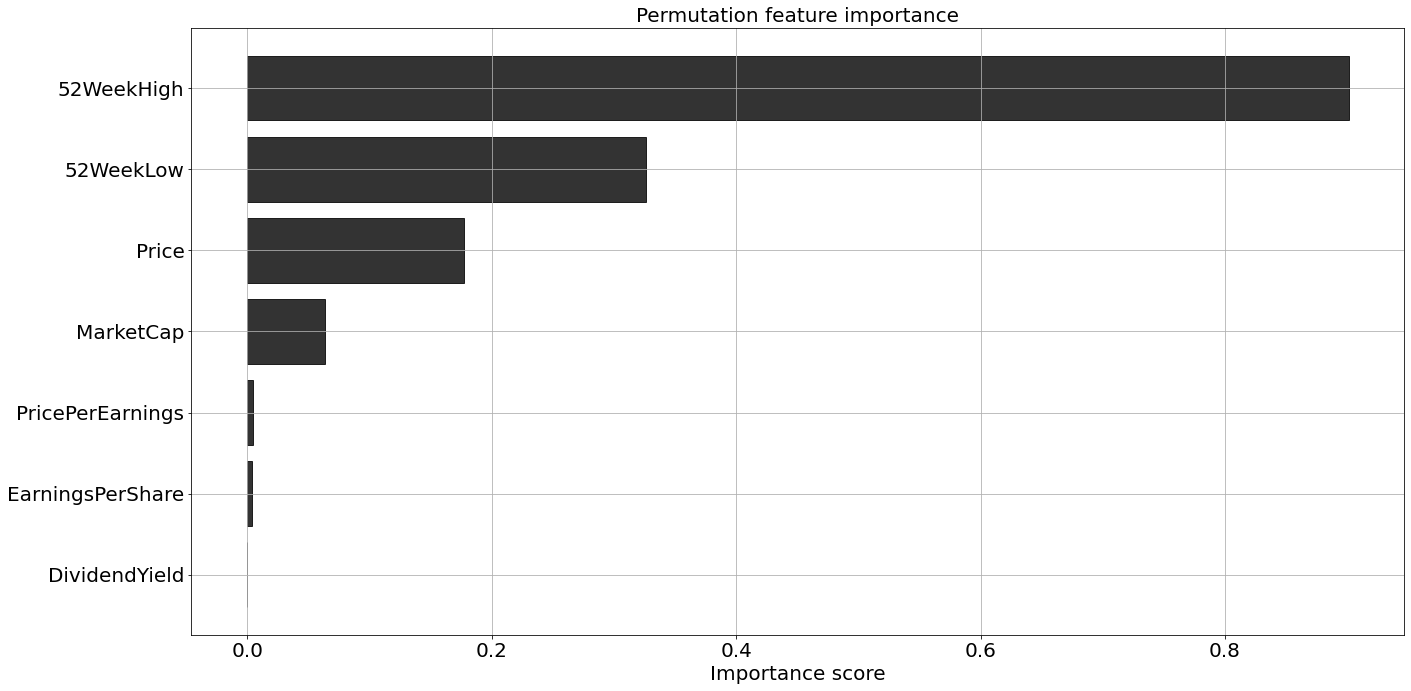

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='black', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='white', alpha=0.2)
plt.grid(b=None)
plt.gca().invert_yaxis()

fig.tight_layout()